In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
# Dataset original
wines = pd.read_csv("whitewine.csv",sep=";")
feature_names = wines.drop(['quality'],axis=1).columns.values
X = wines.drop(['quality'], axis=1).values

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set(style="white")
sns.countplot(x="quality",data=wines,palette="hls")
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000
mean,6.856381,0.278389,0.333557,6.413357,0.045673,35.219048,137.758333,0.994024,3.187786,0.489826,10.520622,5.883095
std,0.843218,0.101356,0.120082,5.103230,0.021899,16.952787,42.657233,0.003006,0.150757,0.114469,1.231589,0.883227
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.080000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993700,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996060,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.230000,65.800000,0.346000,289.000000,440.000000,1.039000,3.820000,1.080000,14.200000,9.000000


In [5]:
# Se cambia la calificion a binaria
wines_bin = wines.copy()
wines_bin.loc[wines_bin["quality"] <= 5,'quality'] = 0 # quality <= 5 = 0 (malo)
wines_bin.loc[wines_bin["quality"] > 5,'quality'] = 1 # quality > 5 = 1 (bueno)
y_bin = wines_bin['quality'].values

In [6]:
count_poor = len(wines_bin[wines_bin['quality']==0])
count_excellent = len(wines_bin[wines_bin['quality']==1])

pct_of_poor = count_poor/(count_poor+count_excellent)
print("percentage of poor is", pct_of_poor*100)
pct_of_excellent = count_excellent/(count_poor+count_excellent)
print("percentage of excellent", pct_of_excellent*100)

percentage of poor is 32.976190476190474
percentage of excellent 67.02380952380952


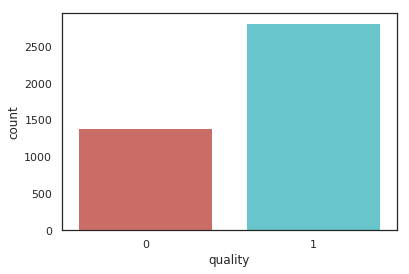

In [7]:
sns.countplot(x="quality",data=wines_bin,palette="hls")
plt.show()

In [8]:
import statsmodels.api as sm
logit_model=sm.Logit(y_bin,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.504166
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.205      
Dependent Variable: y                AIC:              4256.9932  
Date:               2019-03-03 14:44 BIC:              4326.7645  
No. Observations:   4200             Log-Likelihood:   -2117.5    
Df Model:           10               LL-Null:          -2662.8    
Df Residuals:       4189             LLR p-value:      5.3626e-228
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025     0.975]
--------------------------------------------------------------------
x1       -0.1529     0.0514    -2.9721   0.0030    -0.2537   -0.0521
x2       -6.9322     0.4451   -15.5740   0.00

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3)

In [10]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)*100

/home/julian/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


76.90476190476191

In [11]:
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[193 203]
 [ 88 776]]


In [54]:
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)*100

78.88888888888889

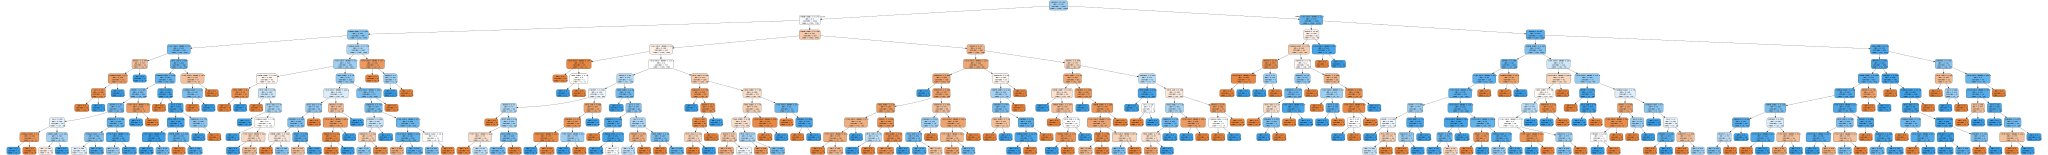

In [55]:
import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names= feature_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

Feature ranking:
1. alcohol (0.155246)
2. volatile acidity (0.116624)
3. density (0.092000)
4. free sulfur dioxide (0.089839)
5. citric acid (0.085906)
6. total sulfur dioxide (0.083914)
7. chlorides (0.077930)
8. residual sugar (0.077721)
9. pH (0.075916)
10. fixed acidity (0.074325)
11. sulphates (0.070579)


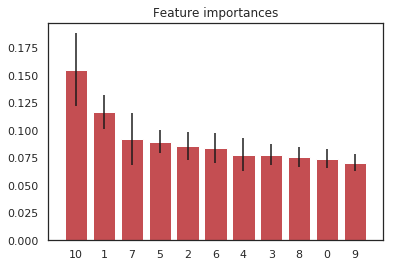

In [71]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

y = y_bin
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


In [70]:
feature_names[9]

'sulphates'